In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style='whitegrid')

# Load Datasets
trader_df = pd.read_csv('../data/trader_data.csv')
sentiment_df = pd.read_csv('../data/market_sentiment.csv')

# Preview the data
print(trader_df.head())
print(sentiment_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [5]:
print("Trader Data Info:")
trader_df.info()

print("\nSentiment Data Info:")
sentiment_df.info()

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

In [6]:
# Convert columns to datetime
trader_df['time'] = pd.to_datetime(trader_df['time'])
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# Create 'date' columns for merging
trader_df['date'] = trader_df['time'].dt.date
sentiment_df['date'] = sentiment_df['Date'].dt.date


KeyError: 'time'

In [8]:
print(trader_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [9]:
# Convert 'Timestamp' to datetime
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])

# Convert 'Date' in sentiment_df to datetime
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# Create a 'date' column (date only, no time) for merging
trader_df['date'] = trader_df['Timestamp'].dt.date
sentiment_df['date'] = sentiment_df['Date'].dt.date

KeyError: 'Date'

In [10]:
print(sentiment_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [11]:
# Convert 'Timestamp' in trader_df to datetime
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])

# Convert 'date' in sentiment_df to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Create 'date' columns (extracting date only from timestamp)
trader_df['date'] = trader_df['Timestamp'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date


In [12]:
# Merge datasets on date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Preview result
display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [13]:
missing = merged_df['classification'].isnull().sum()
print(f"Missing sentiment labels: {missing}")

Missing sentiment labels: 211224


In [14]:
print("Trader data date range:")
print(trader_df['date'].min(), "to", trader_df['date'].max())

print("\nSentiment data date range:")
print(sentiment_df['date'].min(), "to", sentiment_df['date'].max())

Trader data date range:
1970-01-01 to 1970-01-01

Sentiment data date range:
2018-02-01 to 2025-05-02


In [15]:
# Dates with missing sentiment classification
missing_dates = merged_df[merged_df['classification'].isnull()]['date'].value_counts().head(10)
print("Top missing sentiment dates:")
print(missing_dates)

Top missing sentiment dates:
date
1970-01-01    211224
Name: count, dtype: int64


In [16]:
# Re-load trader data fresh without conversions
trader_df_raw = pd.read_csv('../data/trader_data.csv')

# Look at raw timestamp values
print(trader_df_raw['Timestamp'].head(10))
print(trader_df_raw['Timestamp'].dtype)

0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64
float64


In [17]:
trader_df['Timestamp'] = pd.to_datetime(trader_df_raw['Timestamp'], unit='s')  # or 'ms'

OutOfBoundsDatetime: cannot convert input with unit 's'

In [18]:
trader_df['Timestamp'] = pd.to_datetime(trader_df_raw['Timestamp'], unit='ms', errors='coerce')

In [19]:
# Extract just the date
trader_df['date'] = trader_df['Timestamp'].dt.date

# Redo merge
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Check if it worked
print("Missing sentiment labels:", merged_df['classification'].isnull().sum())

Missing sentiment labels: 26961


In [20]:
merged_df_clean = merged_df.dropna(subset=['classification'])
print("Cleaned dataset size:", merged_df_clean.shape)

Cleaned dataset size: (184263, 18)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

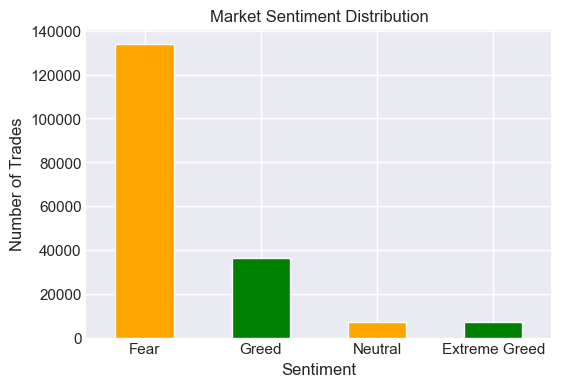

In [22]:
sentiment_counts = merged_df_clean['classification'].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['orange', 'green'])
plt.title("Market Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=0)
plt.show()

In [23]:
# Convert PnL to numeric if not already
merged_df_clean['Closed PnL'] = pd.to_numeric(merged_df_clean['Closed PnL'], errors='coerce')

# Group by sentiment and calculate mean PnL
avg_pnl_by_sentiment = merged_df_clean.groupby('classification')['Closed PnL'].mean()
print("Average Closed PnL by Sentiment:")
print(avg_pnl_by_sentiment)

Average Closed PnL by Sentiment:
classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11064\1923002540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['Closed PnL'] = pd.to_numeric(merged_df_clean['Closed PnL'], errors='coerce')


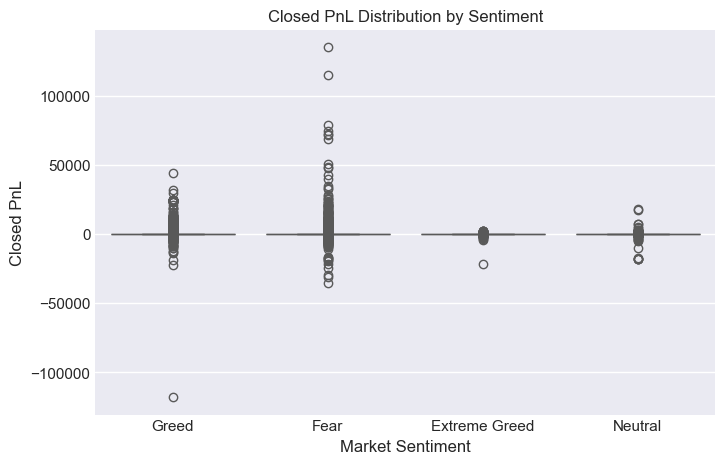

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df_clean)
plt.title("Closed PnL Distribution by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()

In [25]:
merged_df_clean['Leverage'] = pd.to_numeric(merged_df_clean['Leverage'], errors='coerce')

# Plot average leverage by sentiment
avg_leverage = merged_df_clean.groupby('classification')['Leverage'].mean()
print("Average Leverage by Sentiment:")
print(avg_leverage)


plt.figure(figsize=(7, 4))
sns.barplot(x=avg_leverage.index, y=avg_leverage.values, palette=['orange', 'green'])
plt.title("Average Leverage by Sentiment")
plt.ylabel("Average Leverage")
plt.xlabel("Market Sentiment")
plt.show()

KeyError: 'Leverage'

In [26]:
print(merged_df_clean.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification'],
      dtype='object')


Win Rate by Market Sentiment (%):
classification
Extreme Greed    49.008905
Fear             41.514592
Greed            44.647138
Neutral          31.718247
Name: Is_Profit, dtype: float64


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11064\3970005760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['Is_Profit'] = merged_df_clean['Closed PnL'] > 0
C:\Users\Arnav\AppData\Local\Temp\ipykernel_11064\3970005760.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rate.index, y=win_rate.values, palette=['orange', 'green'])
C:\Users\Arnav\AppData\Local\Temp\ipykernel_11064\3970005760.py:12: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=win_rate.index, y=win_rate.values, p

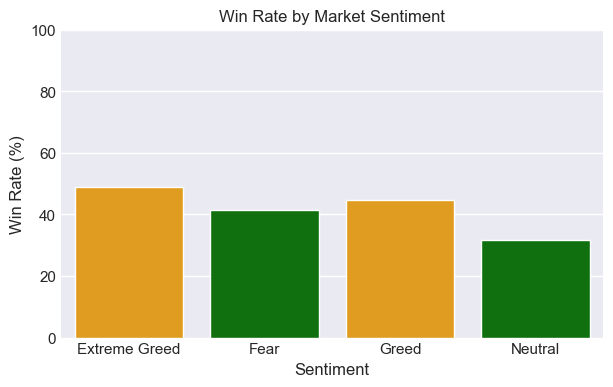

In [27]:
merged_df_clean['Is_Profit'] = merged_df_clean['Closed PnL'] > 0


win_rate = merged_df_clean.groupby('classification')['Is_Profit'].mean() * 100


print("Win Rate by Market Sentiment (%):")
print(win_rate)


plt.figure(figsize=(7, 4))
sns.barplot(x=win_rate.index, y=win_rate.values, palette=['orange', 'green'])
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment")
plt.ylim(0, 100)
plt.show()

Average Trade Size (USD) by Sentiment:
classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: Size USD, dtype: float64


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11064\908135378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['Size USD'] = pd.to_numeric(merged_df_clean['Size USD'], errors='coerce')
C:\Users\Arnav\AppData\Local\Temp\ipykernel_11064\908135378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values, palette=['orange', 'green'])
C:\Users\Arnav\AppData\Local\Temp\ipykernel_11064\908135378.py:11: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=av

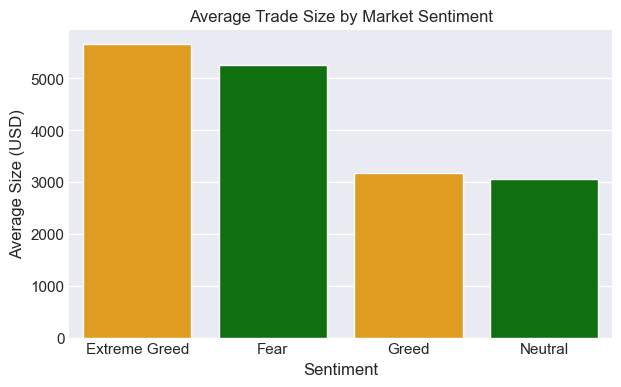

In [28]:
merged_df_clean['Size USD'] = pd.to_numeric(merged_df_clean['Size USD'], errors='coerce')


avg_trade_size = merged_df_clean.groupby('classification')['Size USD'].mean()

print("Average Trade Size (USD) by Sentiment:")
print(avg_trade_size)

# Visual plot
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values, palette=['orange', 'green'])
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Average Size (USD)")
plt.xlabel("Sentiment")
plt.show()